In [1]:
options(jupyter.plot_mimetypes = 'image/png')
options(repr.plot.width=15.0, repr.plot.height=6.0, repr.plot.res=300)

In [3]:
library(rddtools)
# Note1: This packages supports the non-parametric discontinuity estimation using the [Imbens and Kalyanaraman 2012] bandwidth.
# Note2: [Gelman and Imbens 2014] suggests to use a data driven way for choosing the bandwidth in connection with a local linear specification!

In [4]:
tmp <- read.csv("../data/intensity/from_dst_start.csv", header=TRUE)

dst_rdd <- rdd_data(y=within_variation, x=from_dst_start, cutpoint=0, data=tmp)
summary(dst_rdd)

### rdd_data object ###

Cutpoint: 0 
Sample size: 
	-Full : 429 
	-Left : 135 
	-Right: 294
Covariates: no 


In [5]:
pdf(file="../output/sfig7a.pdf", width=23.6, height=9.1)
par(mar=c(5,5,1,1)+0.1)
plot(dst_rdd,
     xlab="# of Days Before or After the DST Start Date",
     ylim=c(0.4,1.4),
     ylab="Mean Musical Intensity",
     device="ggplot",
     cex=1.1,
     cex.lab=2,
     cex.axis=2)
dev.off()

pdf 
  2

### RDD regression: nonparametric local linear###
	Bandwidth:  28.97374 
	Number of obs: 57 (left: 28, right: 29)

	Coefficient:
   Estimate Std. Error z value Pr(>|z|)
D -0.013455   0.012224 -1.1008    0.271


### RDD regression: nonparametric local linear###
	Bandwidth:  28.97374 
	Number of obs: 57 (left: 28, right: 29)

	Weighted Residuals:
     Min       1Q   Median       3Q      Max 
-0.50418 -0.19784 -0.04915  0.01482  0.55214 

	Coefficient:
   Estimate Std. Error z value Pr(>|z|)
D -0.013455   0.012224 -1.1008    0.271

	Local R squared: 0.1436 

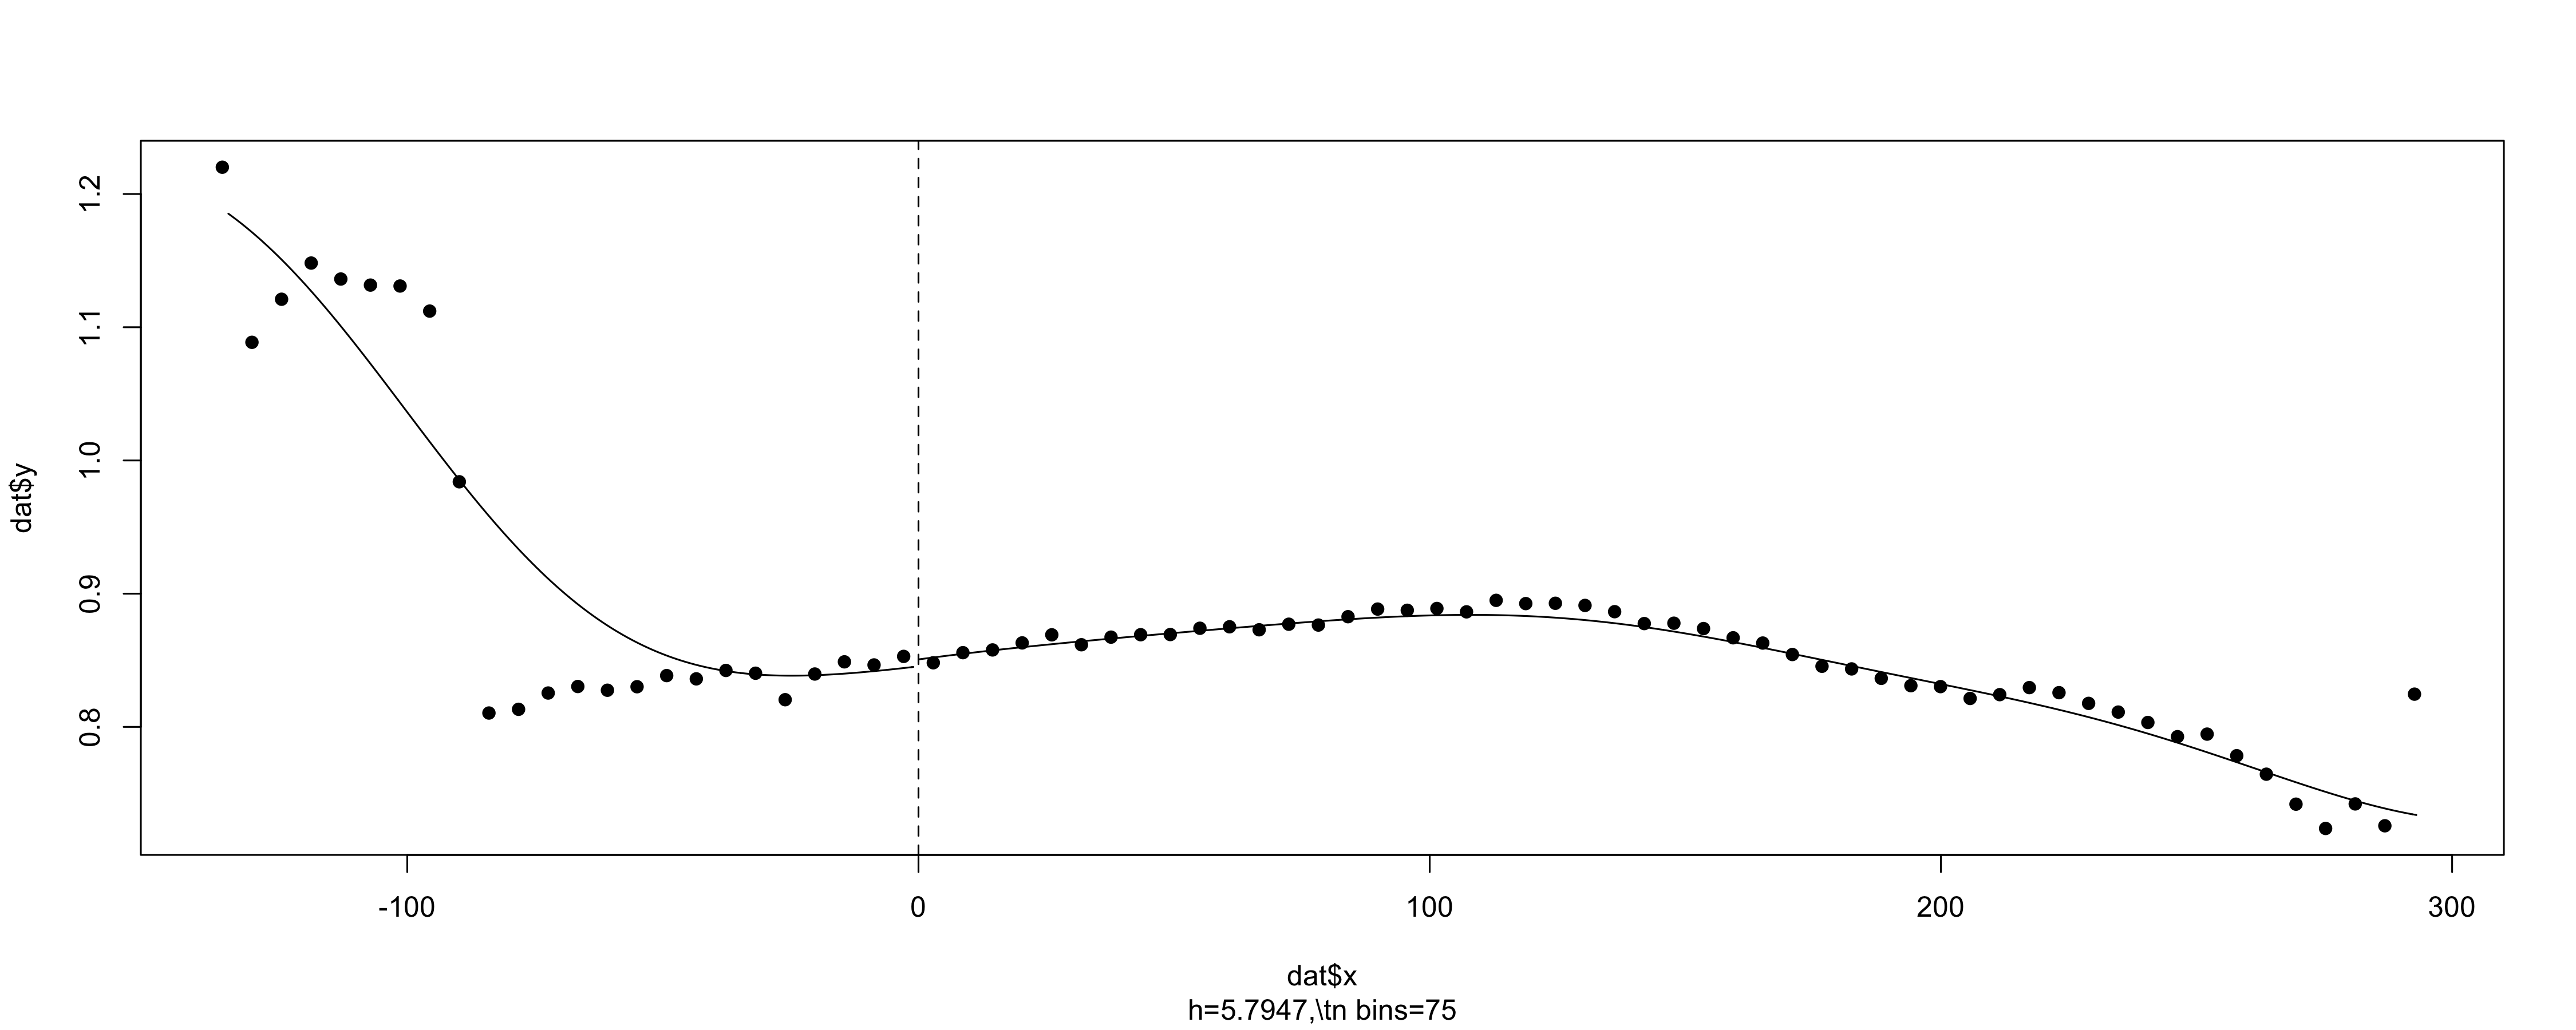

In [6]:
## Run a simple local regression, using the [Imbens and Kalyanaraman 2012] bandwidth ##
# Note: p < 0.05 rejects the assumption that there was no discontinuities in the assignment variable.
bw_ik <- rdd_bw_ik(dst_rdd)
reg_nonpara <- rdd_reg_np(rdd_object=dst_rdd, bw=bw_ik)
print(reg_nonpara)
summary(reg_nonpara)
plot(x=reg_nonpara)


	McCrary Test for no discontinuity of density around cutpoint

data:  reg_nonpara
z-val = 0.19994, p-value = 0.8415
alternative hypothesis: Density is discontinuous around cutpoint
sample estimates:
Discontinuity 
   0.08982442 


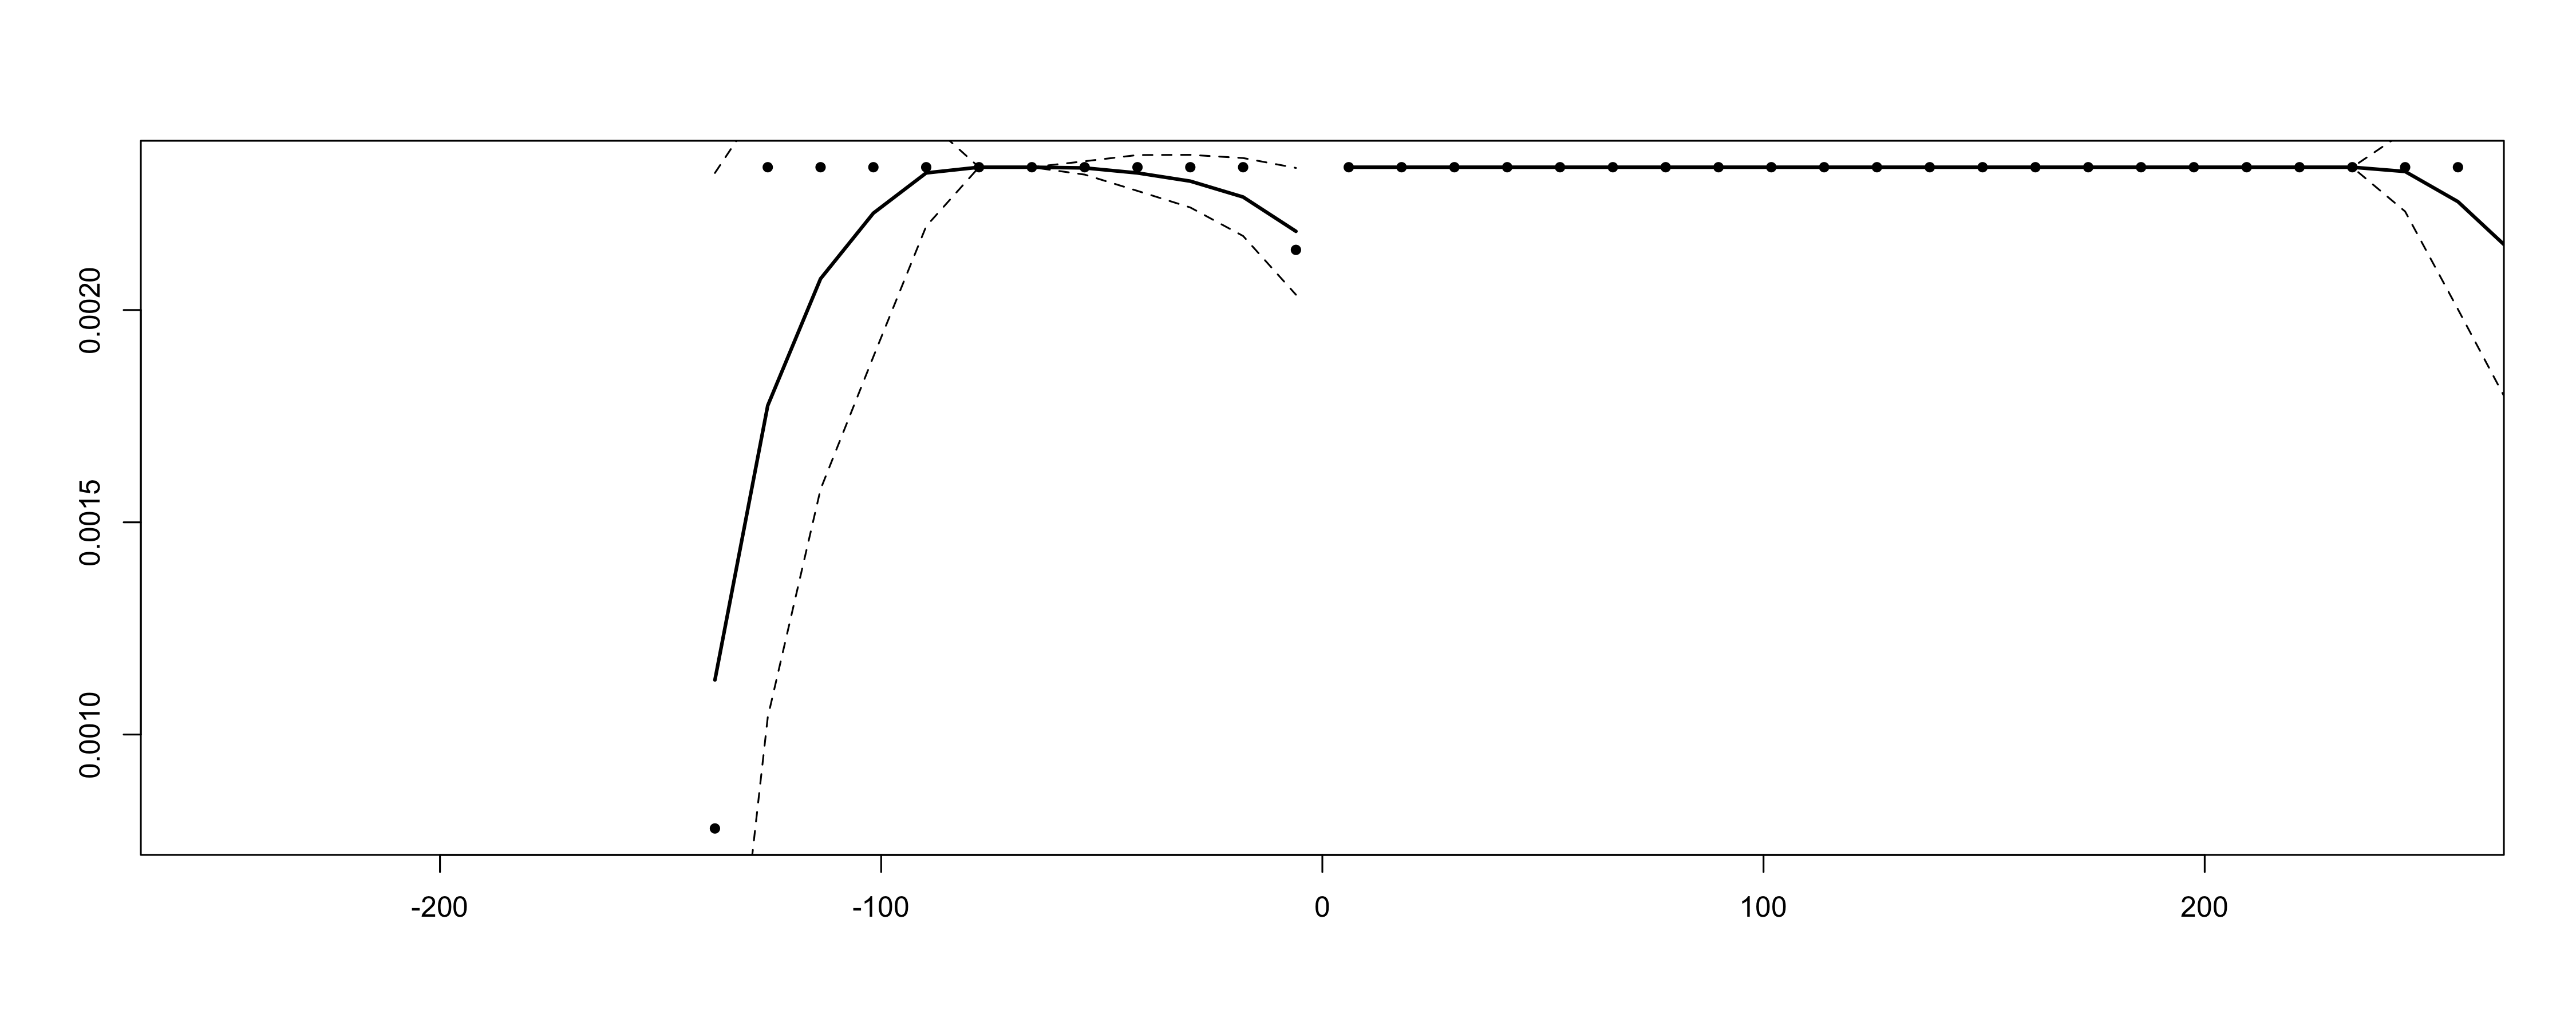

In [7]:
## Test whether there is possible discontinuity around the cutoff (McCrary test) ##
# Note: p < 0.05 rejects the assumption that there was no discontinuities in the assignment variable.
dens_test(reg_nonpara)

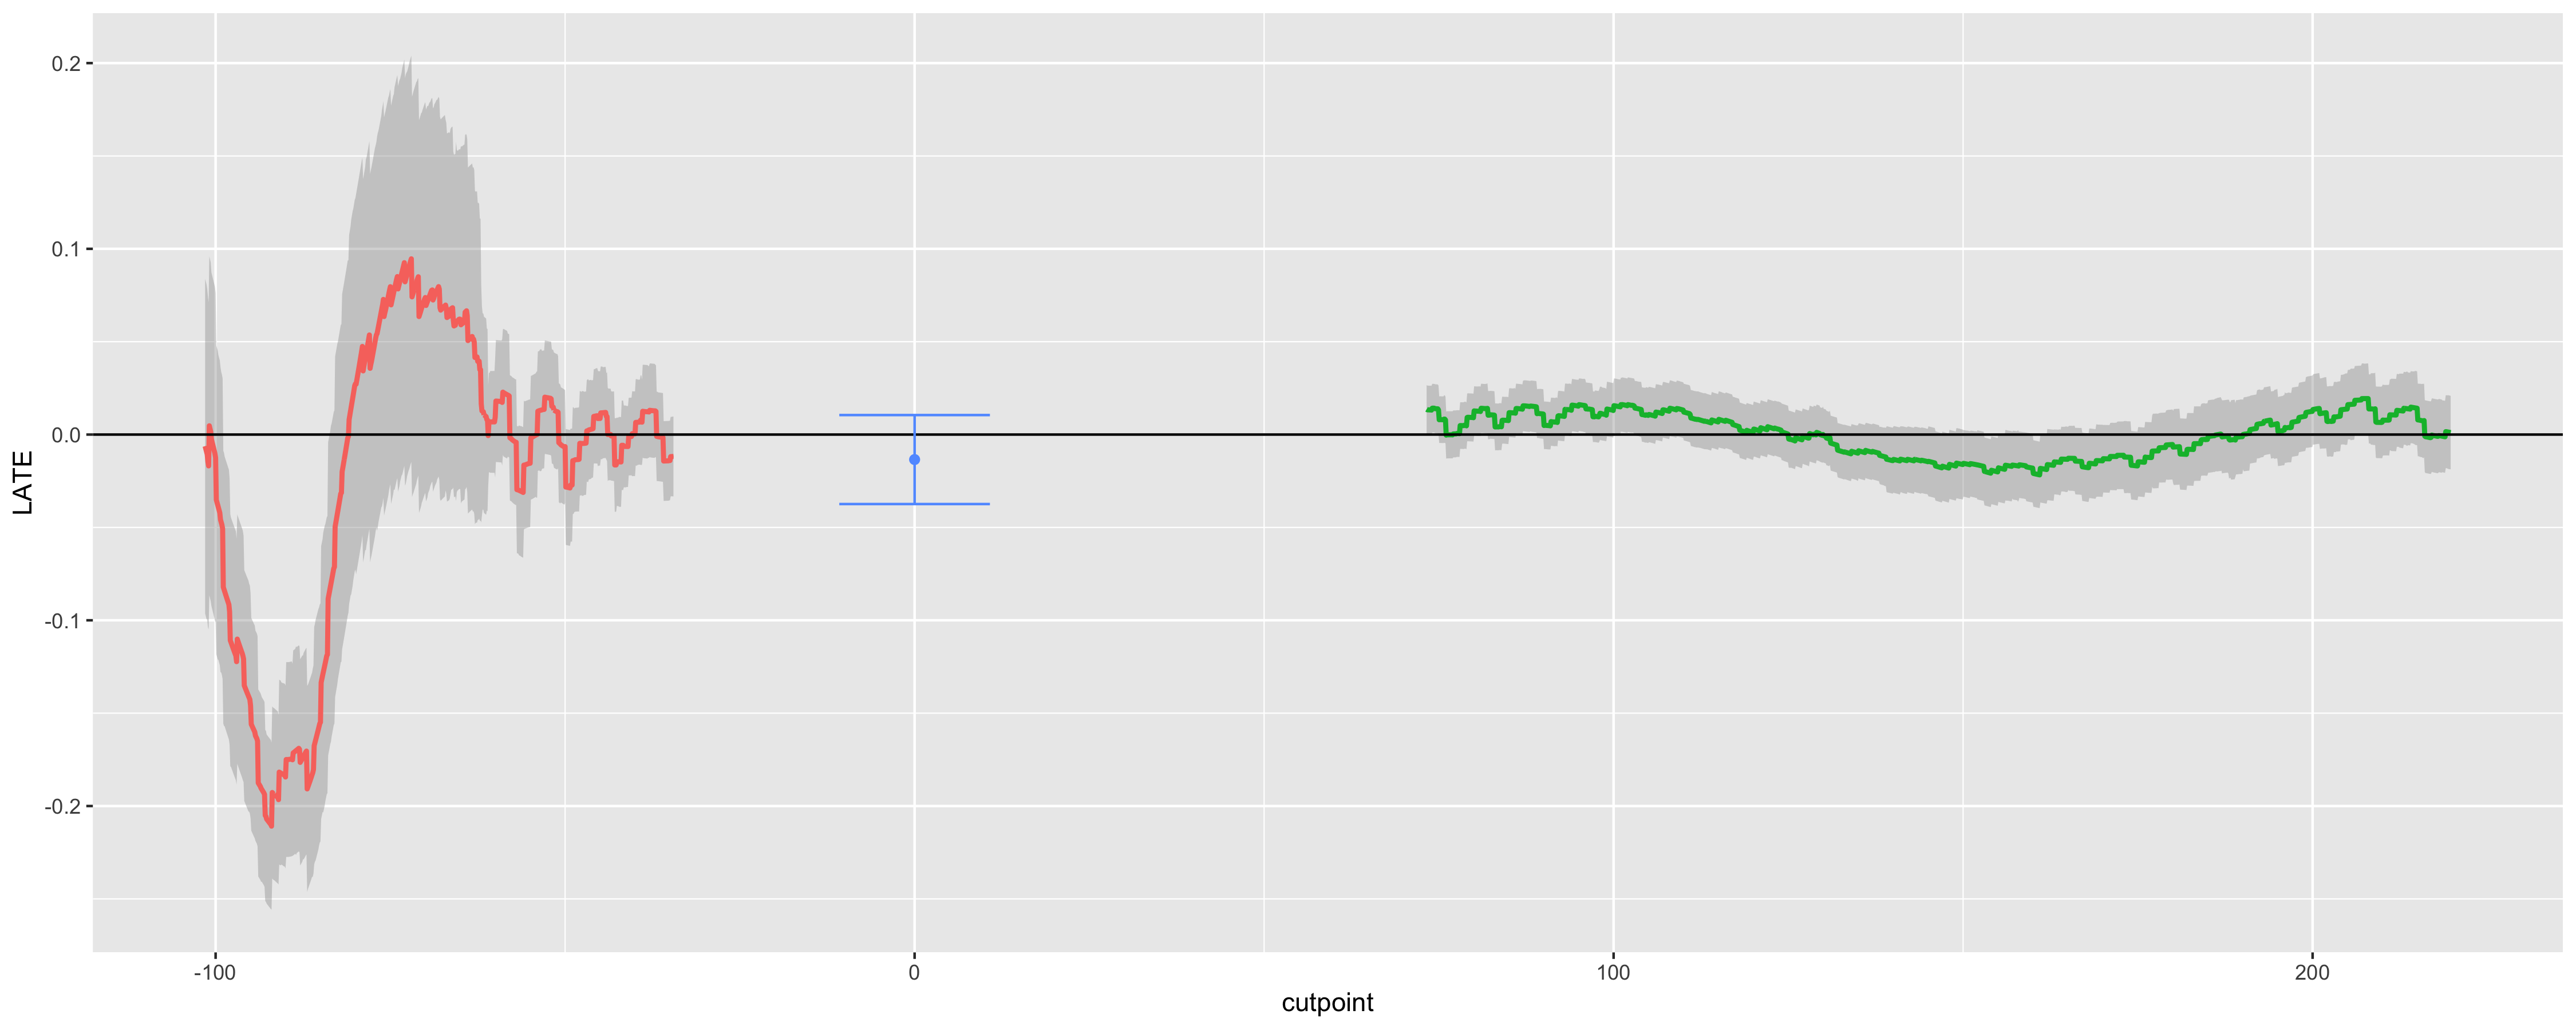

In [8]:
## Check the sensitivity of the estimate to different bandwidths (Placebo test) ##
# Note: Visually estimate whether most of the "placebo" cutoffs yield a confidence interval that substantially covers zero in comparison to the marginal coverage at the actual cutoff. 
plotPlacebo(reg_nonpara)